In [248]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [249]:
df=pd.read_csv("Uncleaned_DS_jobs.csv")
pd.set_option('display.max_rows',None)
df


index                                          Job Title  \
0        0                                  Sr Data Scientist   
1        1                                     Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
5        5                                     Data Scientist   
6        6           Data Scientist / Machine Learning Expert   
7        7                                     Data Scientist   
8        8                   Staff Data Scientist - Analytics   
9        9                                     Data Scientist   
10      10                                     Data Scientist   
11      11                                     Data Scientist   
12      12          Data Scientist - Statistics, Early Career   
13      13                                       Data Modeler   
14      14                                     Data Scientist   
15      15                         Experienced Data Scientist   
16      16                          Data Scientist - Contract   
17      17                                     Data Scientist   
18      18                                    Data Analyst II   
19      19                              Medical Lab Scientist   
20      20                                     Data Scientist   
21      21                    Data Scientist/Machine Learning   
22      22                            Human Factors Scientist   
23      23     Business Intelligence Analyst I- Data Insights   
24      24                                     Data Scientist   
25      25                                     Data Scientist   
26      26                              Data Scientist - Risk   
27      27                     Data Scientist-Human Resources   
28      28                                     Data Scientist   
29      29                                     Data Scientist   
30      30                                     Data Scientist   
31      31           Data Scientist / Machine Learning Expert   
32      32                                     Data Scientist   
33      33       Senior Research Statistician- Data Scientist   
34      34                                      Data Engineer   
35      35                           Associate Data Scientist   
36      36                      Business Intelligence Analyst   
37      37                                     Data Scientist   
38      38                                     Data Scientist   
39      39                      Senior Analyst/Data Scientist   
40      40                                       Data Analyst   
41      41                          Machine Learning Engineer   
42      42                                     Data Analyst I   
43      43                      Scientist - Molecular Biology   
44      44                                     Data Scientist   
45      45          Computational Scientist, Machine Learning   
46      46                              Senior Data Scientist   
47      47                                     Data Scientist   
48      48                                     Data Scientist   
49      49                                     Data Scientist   
50      50                                       Data Analyst   
51      51                                     Data Scientist   
52      52                                     Data Scientist   
53      53                                  Jr. Data Engineer   
54      54                            E-Commerce Data Analyst   
55      55                            Data Analytics Engineer   
56      56                              Senior Data Scientist   
57      57          Product Data Scientist - Ads Data Science   
58      58                                     Data Scientist   
59      59                      Data Scientist - Intermediate   
60      60                              

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [251]:
df.shape

(672, 15)

In [252]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

# Cleaning

In [253]:
df['Job Title'].value_counts().keys()

Index(['Data Scientist', 'Data Engineer', 'Senior Data Scientist',
       'Machine Learning Engineer', 'Data Analyst', 'Senior Data Analyst',
       'Senior Data Engineer', 'Data Science Software Engineer',
       'ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR',
       'Data Scientist - TS/SCI FSP or CI Required',
       ...
       'Computational Scientist, Machine Learning', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Global Data Analyst',
       'Data Engineer (Remote)', 'Data Science Instructor',
       'Business Data Analyst', 'Purification Scientist',
       'Data Engineer, Enterprise Analytics',
       'AI/ML - Machine Learning Scientist, Siri Understanding'],
      dtype='object', length=172)

In [254]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [255]:
df['Sector'].value_counts()

Information Technology                188
Business Services                     120
-1                                     71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: Sector, dtype: int64

In [256]:
# df['Job Description'].unique()

In [257]:
df["Type of ownership"].value_counts()

Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

In [258]:
df["Type of ownership"].value_counts().keys()

Index(['Company - Private', 'Company - Public', 'Nonprofit Organization',
       'Subsidiary or Business Segment', '-1', 'Government',
       'Other Organization', 'Private Practice / Firm', 'Unknown',
       'College / University', 'Self-employed', 'Contract', 'Hospital'],
      dtype='object')

In [259]:
df.head(1)

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   

       Company Name      Location  Headquarters                    Size  \
0  Healthfirst\n3.1  New York, NY  New York, NY  1001 to 5000 employees   

   Founded       Type of ownership            Industry     Sector  \
0     1993  Nonprofit Organization  Insurance Carriers  Insurance   

                    Revenue                              Competitors  
0  Unknown / Non-Applicable  EmblemHealth, UnitedHealth Group, Aetna

In [260]:
df['Job Description'].replace("\n","-->")

0      Description\n\nThe Senior Data Scientist is re...
1      Secure our Nation, Ignite your Future\n\nJoin ...
2      Overview\n\n\nAnalysis Group is one of the lar...
3      JOB DESCRIPTION:\n\nDo you have a passion for ...
4      Data Scientist\nAffinity Solutions / Marketing...
5      About Us:\n\nHeadquartered in beautiful Santa ...
6      Posting Title\nData Scientist / Machine Learni...
7      Introduction\n\nHave you always wanted to run ...
8      Intuit is seeking a Staff Data Scientist to co...
9      Ready to write the best chapter of your career...
10     Join our team dedicated to developing and exec...
11     About Us\n\n\nInterested in working for a huma...
12     *Organization and Job ID**\nJob ID: 310918\n\n...
13     POSITION PURPOSE:\n\nThe Data Architect/Data M...
14     Position Description:\n\nWant to make a differ...
15     *******Please Apply using this link: https://a...
16     We are an ambitious, well-funded startup with ...
17     Job Success Profile\n\nD

In [261]:
rep=[]
for i in df['Company Name']:
    if i.isalnum:
        a=i[-4::]
        b=i.replace(a," ")
        rep.append(b)
rep        

['Healthfirst ',
 'ManTech ',
 'Analysis Group ',
 'INFICON ',
 'Affinity Solutions ',
 'HG Insights ',
 'Novartis ',
 'iRobot ',
 'Intuit - Data ',
 'XSELL Technologies ',
 'Novetta ',
 '1904labs ',
 'PNNL ',
 'Old World Industries ',
 'Mathematica Policy Research ',
 'Guzman & Griffin Technologies (GGTI) ',
 'Upside Business Travel ',
 'Buckman ',
 'Insight Enterprises, Inc. ',
 'Tower Health ',
 'Triplebyte ',
 'PulsePoint ',
 'Exponent ',
 'Guardian Life ',
 'Spectrum Communications and Consulting ',
 'Oversight Systems ',
 'LSQ ',
 'MIT Lincoln Laboratory ',
 'Kingfisher Systems ',
 'Formation ',
 'Analysis Group ',
 'Novartis ',
 'Cohere Health ',
 'Acuity Insurance ',
 'Chef ',
 'Puget Sound Energy ',
 'Sandhills Global ',
 'A Place for Mom ',
 'Great-Circle Technologies ',
 'Edmunds.com ',
 'Cambridge Associates, LLC ',
 'Liberty Mutual Insurance ',
 'Cenlar ',
 'Arsenal Biosciences ',
 'Eversight ',
 'Pfizer ',
 'Klaviyo ',
 'Intellectual Ventures ',
 'GovTech ',
 'Quick Base 

In [262]:
df['Company Name']=rep
df['Company Name']

0                                           Healthfirst 
1                                               ManTech 
2                                        Analysis Group 
3                                               INFICON 
4                                    Affinity Solutions 
5                                           HG Insights 
6                                              Novartis 
7                                                iRobot 
8                                         Intuit - Data 
9                                    XSELL Technologies 
10                                              Novetta 
11                                             1904labs 
12                                                 PNNL 
13                                 Old World Industries 
14                          Mathematica Policy Research 
15                 Guzman & Griffin Technologies (GGTI) 
16                               Upside Business Travel 
17                             

In [263]:
df.head(5)

index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

          Company Name       Location            Headquarters  \
0         Healthfirst    New York, NY            New York, NY   
1             ManTech   Chantilly, VA             Herndon, VA   
2      Analysis Group      Boston, MA              Boston, MA   
3             INFICON      Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions    New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [264]:
df['Company Name'][-4:-1]

668                         
669                  Access 
670    ChaTeck Incorporated 
Name: Company Name, dtype: object

In [265]:
df['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [266]:
sal=[]
for i in df['Salary Estimate']:
    a=i.replace("$"," ").replace('(Glassdoor est.)'," ").replace('K',' ').replace('(Employer est.)'," ")
    
    sal.append(a)
sal    

[' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 137 - 171   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 ' 75 - 131   ',
 

In [267]:
df['Salary Estimate']=sal
df.head(5)

index          Job Title Salary Estimate  \
0      0  Sr Data Scientist    137 - 171      
1      1     Data Scientist    137 - 171      
2      2     Data Scientist    137 - 171      
3      3     Data Scientist    137 - 171      
4      4     Data Scientist    137 - 171      

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

          Company Name       Location            Headquarters  \
0         Healthfirst    New York, NY            New York, NY   
1             ManTech   Chantilly, VA             Herndon, VA   
2      Analysis Group      Boston, MA              Boston, MA   
3             INFICON      Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions    New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  
0            EmblemHealth, UnitedHealth Group, Aetna  
1                                                 -1  
2                                                 -1  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...  
4               Commerce Signals, Cardlytics, Yodlee

In [268]:
df['Headquarters'].value_counts()                        

New York, NY                 33
-1                           31
San Francisco, CA            31
Chicago, IL                  23
Boston, MA                   19
Reston, VA                   14
Mc Lean, VA                  13
Westminster, CO              12
Cambridge, United Kingdom    10
Cambridge, MA                10
Vienna, VA                    8
Denver, CO                    7
Herndon, VA                   7
Washington, DC                7
Woodbine, MD                  7
Saint Louis, MO               7
Bedford, MA                   7
Arlington, VA                 7
San Jose, CA                  7
San Antonio, TX               6
Mountain View, CA             6
Basel, Switzerland            6
San Rafael, CA                6
Chantilly, VA                 6
Fairfax, VA                   5
Houston, TX                   5
Pittsburgh, PA                5
Bethesda, MD                  5
Rockville, MD                 5
Los Angeles, CA               5
Springfield, MA               5
Bellevue

In [269]:
df['Location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [270]:
df['Headquarters'].unique()

array(['New York, NY', 'Herndon, VA', 'Boston, MA',
       'Bad Ragaz, Switzerland', 'Santa Barbara, CA',
       'Basel, Switzerland', 'Bedford, MA', 'Mountain View, CA',
       'Chicago, IL', 'Mc Lean, VA', 'Saint Louis, MO', 'Richland, WA',
       'Northbrook, IL', 'Princeton, NJ', 'Mays Landing, NJ',
       'Washington, DC', 'Memphis, TN', 'Tempe, AZ', 'Reading, PA',
       'San Francisco, CA', 'Menlo Park, CA', 'Atlanta, GA',
       'Orlando, FL', 'Lexington, MA', 'Falls Church, VA',
       'Sheboygan, WI', 'Seattle, WA', 'Bellevue, WA', 'Lincoln, NE',
       'Chantilly, VA', 'Santa Monica, CA', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Singapore, Singapore',
       'Cambridge, MA', 'OSAKA, Japan', 'Santa Clara, CA', 'Vienna, VA',
       'New Orleans, LA', 'Akron, OH', 'Zurich, Switzerland',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'San Ramon, CA',
       'Brisbane, CA', 'Winter Park, FL', 'San Rafael, CA',
       'Deerfield, IL', 'Ipswich, MA',

In [271]:
df['Salary Estimate'].unique()

array([' 137 - 171   ', ' 75 - 131   ', ' 79 - 131   ', ' 99 - 132   ',
       ' 90 - 109   ', ' 101 - 165   ', ' 56 - 97   ', ' 79 - 106   ',
       ' 71 - 123   ', ' 90 - 124   ', ' 91 - 150   ', ' 141 - 225   ',
       ' 145 - 225  ', ' 79 - 147   ', ' 122 - 146   ', ' 112 - 116   ',
       ' 110 - 163   ', ' 124 - 198   ', ' 79 - 133   ', ' 69 - 116   ',
       ' 31 - 56   ', ' 95 - 119   ', ' 212 - 331   ', ' 66 - 112   ',
       ' 128 - 201   ', ' 138 - 158   ', ' 80 - 132   ', ' 87 - 141   ',
       ' 92 - 155   ', ' 105 - 167   '], dtype=object)

In [272]:
mini=[int(range_str.split('-')[0]) for range_str in df['Salary Estimate']]
df['Minimum Sal']=mini
print(mini)

[137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 

In [273]:
df.head()

index          Job Title Salary Estimate  \
0      0  Sr Data Scientist    137 - 171      
1      1     Data Scientist    137 - 171      
2      2     Data Scientist    137 - 171      
3      3     Data Scientist    137 - 171      
4      4     Data Scientist    137 - 171      

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

          Company Name       Location            Headquarters  \
0         Healthfirst    New York, NY            New York, NY   
1             ManTech   Chantilly, VA             Herndon, VA   
2      Analysis Group      Boston, MA              Boston, MA   
3             INFICON      Newton, MA  Bad Ragaz, Switzerland   
4  Affinity Solutions    New York, NY            New York, NY   

                      Size  Founded        Type of ownership  \
0   1001 to 5000 employees     1993   Nonprofit Organization   
1  5001 to 10000 employees     1968         Company - Public   
2   1001 to 5000 employees     1981  Private Practice / Firm   
3    501 to 1000 employees     2000         Company - Public   
4      51 to 200 employees     1998        Company - Private   

                                Industry             Sector  \
0                     Insurance Carriers          Insurance   
1                 Research & Development  Business Services   
2                             Consulting  Business Services   
3  Electrical & Electronic Manufacturing      Manufacturing   
4                Advertising & Marketing  Business Services   

                      Revenue  \
0    Unknown / Non-Applicable   
1      $1 to $2 billion (USD)   
2  $100 to $500 million (USD)   
3  $100 to $500 million (USD)   
4    Unknown / Non-Applicable   

                                         Competitors  Minimum Sal  
0            EmblemHealth, UnitedHealth Group, Aetna          137  
1                                                 -1          137  
2                                                 -1          137  
3  MKS Instruments, Pfeiffer Vacuum, Agilent Tech...          137  
4               Commerce Signals, Cardlytics, Yodlee          137

In [274]:
maximum=[int(range_str.split('-')[1]) for range_str in df['Salary Estimate']]
df['Maximum Sal']=maximum
df

index                                          Job Title Salary Estimate  \
0        0                                  Sr Data Scientist    137 - 171      
1        1                                     Data Scientist    137 - 171      
2        2                                     Data Scientist    137 - 171      
3        3                                     Data Scientist    137 - 171      
4        4                                     Data Scientist    137 - 171      
5        5                                     Data Scientist    137 - 171      
6        6           Data Scientist / Machine Learning Expert    137 - 171      
7        7                                     Data Scientist    137 - 171      
8        8                   Staff Data Scientist - Analytics    137 - 171      
9        9                                     Data Scientist    137 - 171      
10      10                                     Data Scientist    137 - 171      
11      11                                     Data Scientist    137 - 171      
12      12          Data Scientist - Statistics, Early Career    137 - 171      
13      13                                       Data Modeler    137 - 171      
14      14                                     Data Scientist    137 - 171      
15      15                         Experienced Data Scientist    137 - 171      
16      16                          Data Scientist - Contract    137 - 171      
17      17                                     Data Scientist    137 - 171      
18      18                                    Data Analyst II    137 - 171      
19      19                              Medical Lab Scientist    137 - 171      
20      20                                     Data Scientist    137 - 171      
21      21                    Data Scientist/Machine Learning    137 - 171      
22      22                            Human Factors Scientist    137 - 171      
23      23     Business Intelligence Analyst I- Data Insights    137 - 171      
24      24                                     Data Scientist    137 - 171      
25      25                                     Data Scientist    137 - 171      
26      26                              Data Scientist - Risk    137 - 171      
27      27                     Data Scientist-Human Resources    137 - 171      
28      28                                     Data Scientist    137 - 171      
29      29                                     Data Scientist    137 - 171      
30      30                                     Data Scientist     75 - 131      
31      31           Data Scientist / Machine Learning Expert     75 - 131      
32      32                                     Data Scientist     75 - 131      
33      33       Senior Research Statistician- Data Scientist     75 - 131      
34      34                                      Data Engineer     75 - 131      
35      35                           Associate Data Scientist     75 - 131      
36      36                      Business Intelligence Analyst     75 - 131      
37      37                                     Data Scientist     75 - 131      
38      38                                     Data Scientist     75 - 131      
39      39                      Senior Analyst/Data Scientist     75 - 131      
40      40                                       Data Analyst     75 - 131      
41      41                          Machine Learning Engineer     75 - 131      
42      42                                     Data Analyst I     75 - 131      
43      43                      Scientist - Molecular Biology     75 - 131      
44      44                                     Data Scientist     75 - 131      
45      45          Computational Scientist, Machine Learning     75 - 131      
46      46                              Senior Data Scientist     75 - 131      
47      47                                     Data Scientist     75 - 131      
48      48                          

In [275]:
average=(df['Minimum Sal']+df['Maximum Sal'])//2
df['Average Sal']=average
df

index                                          Job Title Salary Estimate  \
0        0                                  Sr Data Scientist    137 - 171      
1        1                                     Data Scientist    137 - 171      
2        2                                     Data Scientist    137 - 171      
3        3                                     Data Scientist    137 - 171      
4        4                                     Data Scientist    137 - 171      
5        5                                     Data Scientist    137 - 171      
6        6           Data Scientist / Machine Learning Expert    137 - 171      
7        7                                     Data Scientist    137 - 171      
8        8                   Staff Data Scientist - Analytics    137 - 171      
9        9                                     Data Scientist    137 - 171      
10      10                                     Data Scientist    137 - 171      
11      11                                     Data Scientist    137 - 171      
12      12          Data Scientist - Statistics, Early Career    137 - 171      
13      13                                       Data Modeler    137 - 171      
14      14                                     Data Scientist    137 - 171      
15      15                         Experienced Data Scientist    137 - 171      
16      16                          Data Scientist - Contract    137 - 171      
17      17                                     Data Scientist    137 - 171      
18      18                                    Data Analyst II    137 - 171      
19      19                              Medical Lab Scientist    137 - 171      
20      20                                     Data Scientist    137 - 171      
21      21                    Data Scientist/Machine Learning    137 - 171      
22      22                            Human Factors Scientist    137 - 171      
23      23     Business Intelligence Analyst I- Data Insights    137 - 171      
24      24                                     Data Scientist    137 - 171      
25      25                                     Data Scientist    137 - 171      
26      26                              Data Scientist - Risk    137 - 171      
27      27                     Data Scientist-Human Resources    137 - 171      
28      28                                     Data Scientist    137 - 171      
29      29                                     Data Scientist    137 - 171      
30      30                                     Data Scientist     75 - 131      
31      31           Data Scientist / Machine Learning Expert     75 - 131      
32      32                                     Data Scientist     75 - 131      
33      33       Senior Research Statistician- Data Scientist     75 - 131      
34      34                                      Data Engineer     75 - 131      
35      35                           Associate Data Scientist     75 - 131      
36      36                      Business Intelligence Analyst     75 - 131      
37      37                                     Data Scientist     75 - 131      
38      38                                     Data Scientist     75 - 131      
39      39                      Senior Analyst/Data Scientist     75 - 131      
40      40                                       Data Analyst     75 - 131      
41      41                          Machine Learning Engineer     75 - 131      
42      42                                     Data Analyst I     75 - 131      
43      43                      Scientist - Molecular Biology     75 - 131      
44      44                                     Data Scientist     75 - 131      
45      45          Computational Scientist, Machine Learning     75 - 131      
46      46                              Senior Data Scientist     75 - 131      
47      47                                     Data Scientist     75 - 131      
48      48                          

In [276]:
# [location.split(', ')[1] for location in df['Location']]
main_location=[location.split(', ')[1] if ', ' in location else location.split(', ')[0] for location in df['Location']]
df['main Loc']=main_location
del df['index']
df

Job Title Salary Estimate  \
0                                    Sr Data Scientist    137 - 171      
1                                       Data Scientist    137 - 171      
2                                       Data Scientist    137 - 171      
3                                       Data Scientist    137 - 171      
4                                       Data Scientist    137 - 171      
5                                       Data Scientist    137 - 171      
6             Data Scientist / Machine Learning Expert    137 - 171      
7                                       Data Scientist    137 - 171      
8                     Staff Data Scientist - Analytics    137 - 171      
9                                       Data Scientist    137 - 171      
10                                      Data Scientist    137 - 171      
11                                      Data Scientist    137 - 171      
12           Data Scientist - Statistics, Early Career    137 - 171      
13                                        Data Modeler    137 - 171      
14                                      Data Scientist    137 - 171      
15                          Experienced Data Scientist    137 - 171      
16                           Data Scientist - Contract    137 - 171      
17                                      Data Scientist    137 - 171      
18                                     Data Analyst II    137 - 171      
19                               Medical Lab Scientist    137 - 171      
20                                      Data Scientist    137 - 171      
21                     Data Scientist/Machine Learning    137 - 171      
22                             Human Factors Scientist    137 - 171      
23      Business Intelligence Analyst I- Data Insights    137 - 171      
24                                      Data Scientist    137 - 171      
25                                      Data Scientist    137 - 171      
26                               Data Scientist - Risk    137 - 171      
27                      Data Scientist-Human Resources    137 - 171      
28                                      Data Scientist    137 - 171      
29                                      Data Scientist    137 - 171      
30                                      Data Scientist     75 - 131      
31            Data Scientist / Machine Learning Expert     75 - 131      
32                                      Data Scientist     75 - 131      
33        Senior Research Statistician- Data Scientist     75 - 131      
34                                       Data Engineer     75 - 131      
35                            Associate Data Scientist     75 - 131      
36                       Business Intelligence Analyst     75 - 131      
37                                      Data Scientist     75 - 131      
38                                      Data Scientist     75 - 131      
39                       Senior Analyst/Data Scientist     75 - 131      
40                                        Data Analyst     75 - 131      
41                           Machine Learning Engineer     75 - 131      
42                                      Data Analyst I     75 - 131      
43                       Scientist - Molecular Biology     75 - 131      
44                                      Data Scientist     75 - 131      
45           Computational Scientist, Machine Learning     75 - 131      
46                               Senior Data Scientist     75 - 131      
47                                      Data Scientist     75 - 131      
48                                      Data Scientist     75 - 131      
49                                      Data Scientist     75 - 131      
50                                        Data Analyst     75 - 131      
51                                      Data Scientist     75 - 131      
52                                      Data Scientist     75 - 131      
53                                   Jr. Data Eng

In [277]:
df['Type of ownership'].mode()

0    Company - Private
Name: Type of ownership, dtype: object

In [278]:
df['Type of ownership']=[i.replace("-1", " ") if i == "-1" else i for i in df['Type of ownership']]        

In [279]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [280]:
df['Type of ownership'].mode()

0    Company - Private
Name: Type of ownership, dtype: object

In [281]:
df['Type of ownership']=[i.replace("-1", " ") if i == "-1" else i for i in df['Type of ownership']]    
df['Type of ownership']=df['Type of ownership'].fillna(df['Type of ownership'].mode())
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', ' ',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [282]:
df

Job Title Salary Estimate  \
0                                    Sr Data Scientist    137 - 171      
1                                       Data Scientist    137 - 171      
2                                       Data Scientist    137 - 171      
3                                       Data Scientist    137 - 171      
4                                       Data Scientist    137 - 171      
5                                       Data Scientist    137 - 171      
6             Data Scientist / Machine Learning Expert    137 - 171      
7                                       Data Scientist    137 - 171      
8                     Staff Data Scientist - Analytics    137 - 171      
9                                       Data Scientist    137 - 171      
10                                      Data Scientist    137 - 171      
11                                      Data Scientist    137 - 171      
12           Data Scientist - Statistics, Early Career    137 - 171      
13                                        Data Modeler    137 - 171      
14                                      Data Scientist    137 - 171      
15                          Experienced Data Scientist    137 - 171      
16                           Data Scientist - Contract    137 - 171      
17                                      Data Scientist    137 - 171      
18                                     Data Analyst II    137 - 171      
19                               Medical Lab Scientist    137 - 171      
20                                      Data Scientist    137 - 171      
21                     Data Scientist/Machine Learning    137 - 171      
22                             Human Factors Scientist    137 - 171      
23      Business Intelligence Analyst I- Data Insights    137 - 171      
24                                      Data Scientist    137 - 171      
25                                      Data Scientist    137 - 171      
26                               Data Scientist - Risk    137 - 171      
27                      Data Scientist-Human Resources    137 - 171      
28                                      Data Scientist    137 - 171      
29                                      Data Scientist    137 - 171      
30                                      Data Scientist     75 - 131      
31            Data Scientist / Machine Learning Expert     75 - 131      
32                                      Data Scientist     75 - 131      
33        Senior Research Statistician- Data Scientist     75 - 131      
34                                       Data Engineer     75 - 131      
35                            Associate Data Scientist     75 - 131      
36                       Business Intelligence Analyst     75 - 131      
37                                      Data Scientist     75 - 131      
38                                      Data Scientist     75 - 131      
39                       Senior Analyst/Data Scientist     75 - 131      
40                                        Data Analyst     75 - 131      
41                           Machine Learning Engineer     75 - 131      
42                                      Data Analyst I     75 - 131      
43                       Scientist - Molecular Biology     75 - 131      
44                                      Data Scientist     75 - 131      
45           Computational Scientist, Machine Learning     75 - 131      
46                               Senior Data Scientist     75 - 131      
47                                      Data Scientist     75 - 131      
48                                      Data Scientist     75 - 131      
49                                      Data Scientist     75 - 131      
50                                        Data Analyst     75 - 131      
51                                      Data Scientist     75 - 131      
52                                      Data Scientist     75 - 131      
53                                   Jr. Data Eng

In [283]:
df['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
      dtype=object)

In [284]:
df['Size'].mode()

0    51 to 200 employees
Name: Size, dtype: object

In [285]:
df['Size']=[i.replace("-1","Unknown") if i=="-1" else i for i in df['Size']]
df['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', 'Unknown'],
      dtype=object)

In [286]:
df["Revenue"].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', '-1'], dtype=object)

In [287]:
df["Revenue"].mode()

0    Unknown / Non-Applicable
Name: Revenue, dtype: object

In [288]:
df['Revenue'].isnull().sum()

0

In [289]:
df['Revenue']=[i.replace('-1',' ') if i=="-1" else i for i in df['Revenue']]
df['Revenue']=df['Revenue'].fillna(df["Revenue"].mode())
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', ' '], dtype=object)

In [290]:
df['Competitors'].unique()

array(['EmblemHealth, UnitedHealth Group, Aetna', '-1',
       'MKS Instruments, Pfeiffer Vacuum, Agilent Technologies',
       'Commerce Signals, Cardlytics, Yodlee',
       'Square, PayPal, H&R Block',
       'Leidos, CACI International, Booz Allen Hamilton',
       'Slalom, Daugherty Business Solutions',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'CDW, PCM, SHI International',
       'Crossix Solutions Inc., AppNexus, The Trade Desk',
       'Northwestern Mutual', 'Puppet, Ansible, SaltStack',
       'Enlivant, Sunrise Senior Living, Brookdale Senior Living',
       'TrueCar, Cars.com, Kelley Blue Book',
       'Travelers, Allstate, State Farm', 'Novartis, Baxter, Pfizer',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Facebook, Google, Pinterest', 'DoorDash, Uber, Grubhub',
       'Munich Re, Hannover RE, SCOR', "IMAGE Skincare, Aveda, Kiehl's",
       'Luxoft, EPAM, Capgemini Invent', 'Sequenom',
     

In [291]:
df['Competitors'].mode()

0    -1
Name: Competitors, dtype: object

In [292]:
df['Competitors']=[i.replace("-1","Unknown") if i=='-1' else i for i in df['Competitors']]
# df['Competitors']=df['Sector'].fillna(df['Sector'].
df['Competitors'].unique()

array(['EmblemHealth, UnitedHealth Group, Aetna', 'Unknown',
       'MKS Instruments, Pfeiffer Vacuum, Agilent Technologies',
       'Commerce Signals, Cardlytics, Yodlee',
       'Square, PayPal, H&R Block',
       'Leidos, CACI International, Booz Allen Hamilton',
       'Slalom, Daugherty Business Solutions',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'CDW, PCM, SHI International',
       'Crossix Solutions Inc., AppNexus, The Trade Desk',
       'Northwestern Mutual', 'Puppet, Ansible, SaltStack',
       'Enlivant, Sunrise Senior Living, Brookdale Senior Living',
       'TrueCar, Cars.com, Kelley Blue Book',
       'Travelers, Allstate, State Farm', 'Novartis, Baxter, Pfizer',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Facebook, Google, Pinterest', 'DoorDash, Uber, Grubhub',
       'Munich Re, Hannover RE, SCOR', "IMAGE Skincare, Aveda, Kiehl's",
       'Luxoft, EPAM, Capgemini Invent', 'Sequenom',


In [293]:
df['Sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [294]:
df['Sector'].mode()

0    Information Technology
Name: Sector, dtype: object

In [295]:
df['Sector'] = [i.replace("-1"," ") if i=="-1" else i for i in df['Sector']]
df['Sector']=df['Sector'].fillna(df['Sector'].mode(0))
df['Sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', ' ',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [296]:
df['Industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', '-1', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil 

In [297]:
df['Industry'].dtypes

dtype('O')

In [298]:
df['Industry'].mode()

0    -1
Name: Industry, dtype: object

In [299]:
df['Industry'] = [i.replace("-1","Unknown") if i=="-1" else i for i in df['Industry']]
df['Industry'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', 'Unknown', 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       

In [300]:
df['Headquarters'].unique()

array(['New York, NY', 'Herndon, VA', 'Boston, MA',
       'Bad Ragaz, Switzerland', 'Santa Barbara, CA',
       'Basel, Switzerland', 'Bedford, MA', 'Mountain View, CA',
       'Chicago, IL', 'Mc Lean, VA', 'Saint Louis, MO', 'Richland, WA',
       'Northbrook, IL', 'Princeton, NJ', 'Mays Landing, NJ',
       'Washington, DC', 'Memphis, TN', 'Tempe, AZ', 'Reading, PA',
       'San Francisco, CA', 'Menlo Park, CA', 'Atlanta, GA',
       'Orlando, FL', 'Lexington, MA', 'Falls Church, VA',
       'Sheboygan, WI', 'Seattle, WA', 'Bellevue, WA', 'Lincoln, NE',
       'Chantilly, VA', 'Santa Monica, CA', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Singapore, Singapore',
       'Cambridge, MA', 'OSAKA, Japan', 'Santa Clara, CA', 'Vienna, VA',
       'New Orleans, LA', 'Akron, OH', 'Zurich, Switzerland',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'San Ramon, CA',
       'Brisbane, CA', 'Winter Park, FL', 'San Rafael, CA',
       'Deerfield, IL', 'Ipswich, MA',

In [301]:
df['Headquarters'] = [i.replace("-1","Unknown") if i=="-1" else i for i in df['Headquarters']]
df['Headquarters'].unique()

array(['New York, NY', 'Herndon, VA', 'Boston, MA',
       'Bad Ragaz, Switzerland', 'Santa Barbara, CA',
       'Basel, Switzerland', 'Bedford, MA', 'Mountain View, CA',
       'Chicago, IL', 'Mc Lean, VA', 'Saint Louis, MO', 'Richland, WA',
       'Northbrook, IL', 'Princeton, NJ', 'Mays Landing, NJ',
       'Washington, DC', 'Memphis, TN', 'Tempe, AZ', 'Reading, PA',
       'San Francisco, CA', 'Menlo Park, CA', 'Atlanta, GA',
       'Orlando, FL', 'Lexington, MA', 'Falls Church, VA',
       'Sheboygan, WI', 'Seattle, WA', 'Bellevue, WA', 'Lincoln, NE',
       'Chantilly, VA', 'Santa Monica, CA', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Singapore, Singapore',
       'Cambridge, MA', 'OSAKA, Japan', 'Santa Clara, CA', 'Vienna, VA',
       'New Orleans, LA', 'Akron, OH', 'Zurich, Switzerland',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'San Ramon, CA',
       'Brisbane, CA', 'Winter Park, FL', 'San Rafael, CA',
       'Deerfield, IL', 'Ipswich, MA',

In [302]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [303]:
df['Founded'].median()

1995.0

In [304]:
# print(df)
# df['Founded'] = df['Founded'].replace('-1', pd.NA)

# median_year = df['Founded'].median()

# df['Founded'].fillna(median_year, inplace=True)
# df['Founded'].unique()

In [305]:
df['Founded'] = df['Founded'].replace(-1, np.nan)
df['Founded'].unique()

array([1993., 1968., 1981., 2000., 1998., 2010., 1996., 1990., 1983.,
       2014., 2012., 2016., 1965., 1973., 1986., 1997., 2015., 1945.,
       1988., 2017., 2011., 1967., 1860., 1992., 2003., 1951., 2005.,
       2019., 1925., 2008., 1999., 1978., 1966., 1912., 1958., 2013.,
       1849., 1781., 1926., 2006., 1994., 1863., 1995.,   nan, 1982.,
       1974., 2001., 1985., 1913., 1971., 1911., 2009., 1959., 2007.,
       1939., 2002., 1961., 1963., 1969., 1946., 1957., 1953., 1948.,
       1850., 1851., 2004., 1976., 1918., 1954., 1947., 1955., 2018.,
       1937., 1917., 1935., 1929., 1820., 1952., 1932., 1894., 1960.,
       1788., 1830., 1984., 1933., 1880., 1887., 1970., 1942., 1980.,
       1989., 1908., 1853., 1875., 1914., 1898., 1956., 1977., 1987.,
       1896., 1972., 1949., 1962.])

In [306]:
# df['Founded'].replace('nan', np.nan, inplace=True)

# # Now, convert the column to string, remove trailing '.0', and then to integer
# df['Founded'] = df['Founded'].astype(str).str.rstrip('.0').astype(float).astype('Int64')

# # Finally, check unique values
# print(df['Founded'].unique())

In [307]:
# df['Founded'] = [str(i).replace(".0"," ") if i=="-1" else i for i in df['Founded']]
# # df['Founded'].unique()
df['Founded']=df['Founded'].fillna(df['Founded'].median())
df['Founded'].unique()

array([1993., 1968., 1981., 2000., 1998., 2010., 1996., 1990., 1983.,
       2014., 2012., 2016., 1965., 1973., 1986., 1997., 2015., 1945.,
       1988., 2017., 2011., 1967., 1860., 1992., 2003., 1951., 2005.,
       2019., 1925., 2008., 1999., 1978., 1966., 1912., 1958., 2013.,
       1849., 1781., 1926., 2006., 1994., 1863., 1995., 1982., 1974.,
       2001., 1985., 1913., 1971., 1911., 2009., 1959., 2007., 1939.,
       2002., 1961., 1963., 1969., 1946., 1957., 1953., 1948., 1850.,
       1851., 2004., 1976., 1918., 1954., 1947., 1955., 2018., 1937.,
       1917., 1935., 1929., 1820., 1952., 1932., 1894., 1960., 1788.,
       1830., 1984., 1933., 1880., 1887., 1970., 1942., 1980., 1989.,
       1908., 1853., 1875., 1914., 1898., 1956., 1977., 1987., 1896.,
       1972., 1949., 1962.])

# Visualization

In [308]:
df

Job Title Salary Estimate  \
0                                    Sr Data Scientist    137 - 171      
1                                       Data Scientist    137 - 171      
2                                       Data Scientist    137 - 171      
3                                       Data Scientist    137 - 171      
4                                       Data Scientist    137 - 171      
5                                       Data Scientist    137 - 171      
6             Data Scientist / Machine Learning Expert    137 - 171      
7                                       Data Scientist    137 - 171      
8                     Staff Data Scientist - Analytics    137 - 171      
9                                       Data Scientist    137 - 171      
10                                      Data Scientist    137 - 171      
11                                      Data Scientist    137 - 171      
12           Data Scientist - Statistics, Early Career    137 - 171      
13                                        Data Modeler    137 - 171      
14                                      Data Scientist    137 - 171      
15                          Experienced Data Scientist    137 - 171      
16                           Data Scientist - Contract    137 - 171      
17                                      Data Scientist    137 - 171      
18                                     Data Analyst II    137 - 171      
19                               Medical Lab Scientist    137 - 171      
20                                      Data Scientist    137 - 171      
21                     Data Scientist/Machine Learning    137 - 171      
22                             Human Factors Scientist    137 - 171      
23      Business Intelligence Analyst I- Data Insights    137 - 171      
24                                      Data Scientist    137 - 171      
25                                      Data Scientist    137 - 171      
26                               Data Scientist - Risk    137 - 171      
27                      Data Scientist-Human Resources    137 - 171      
28                                      Data Scientist    137 - 171      
29                                      Data Scientist    137 - 171      
30                                      Data Scientist     75 - 131      
31            Data Scientist / Machine Learning Expert     75 - 131      
32                                      Data Scientist     75 - 131      
33        Senior Research Statistician- Data Scientist     75 - 131      
34                                       Data Engineer     75 - 131      
35                            Associate Data Scientist     75 - 131      
36                       Business Intelligence Analyst     75 - 131      
37                                      Data Scientist     75 - 131      
38                                      Data Scientist     75 - 131      
39                       Senior Analyst/Data Scientist     75 - 131      
40                                        Data Analyst     75 - 131      
41                           Machine Learning Engineer     75 - 131      
42                                      Data Analyst I     75 - 131      
43                       Scientist - Molecular Biology     75 - 131      
44                                      Data Scientist     75 - 131      
45           Computational Scientist, Machine Learning     75 - 131      
46                               Senior Data Scientist     75 - 131      
47                                      Data Scientist     75 - 131      
48                                      Data Scientist     75 - 131      
49                                      Data Scientist     75 - 131      
50                                        Data Analyst     75 - 131      
51                                      Data Scientist     75 - 131      
52                                      Data Scientist     75 - 131      
53                                   Jr. Data Eng

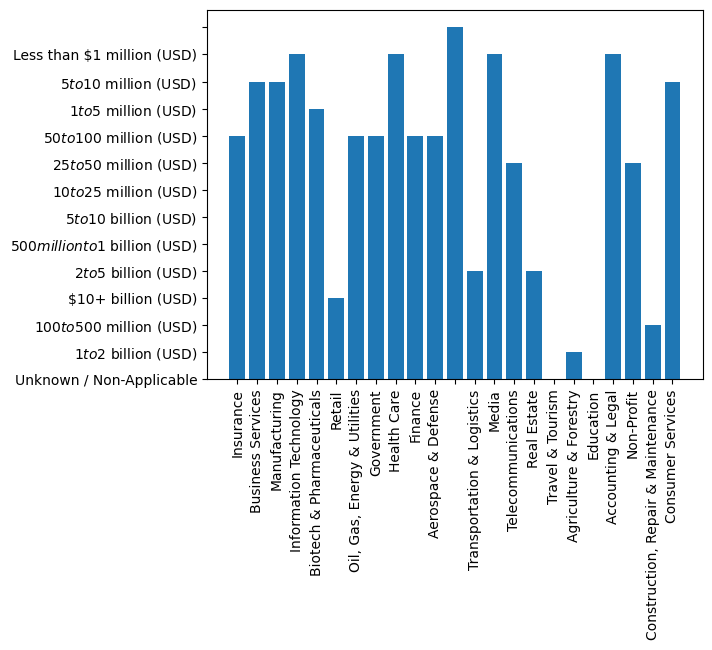

In [309]:
plt.bar(df['Sector'],df['Revenue'])
plt.xticks(rotation=90);

In [310]:
df['main Loc'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', 'Remote', 'TN',
       'TX', 'PA', 'AZ', 'WI', 'GA', 'FL', 'United States', 'NE', 'KS',
       'NH', 'NJ', 'LA', 'OH', 'IN', 'MD', 'CO', 'Utah', 'New Jersey',
       'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA', 'MN', 'OK', 'CT',
       'NC', 'Texas', 'DE', 'Anne Arundel', 'California', 'WV'],
      dtype=object)

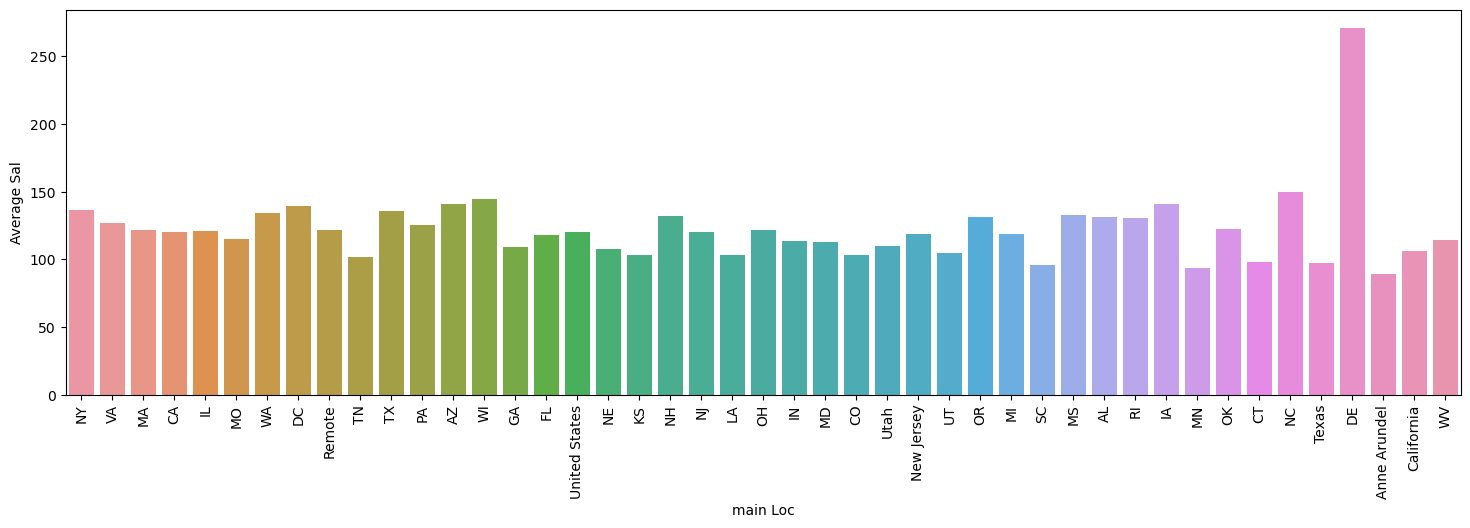

In [311]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(18,5))
# plt.bar(df['main Loc'],df['Average Sal'])
# sns.barplot(x="main Loc",y='Average Sal',estimator=max,data=df)
sns.barplot(x="main Loc",y='Average Sal',ci=None,data=df)
plt.xticks(rotation=90);

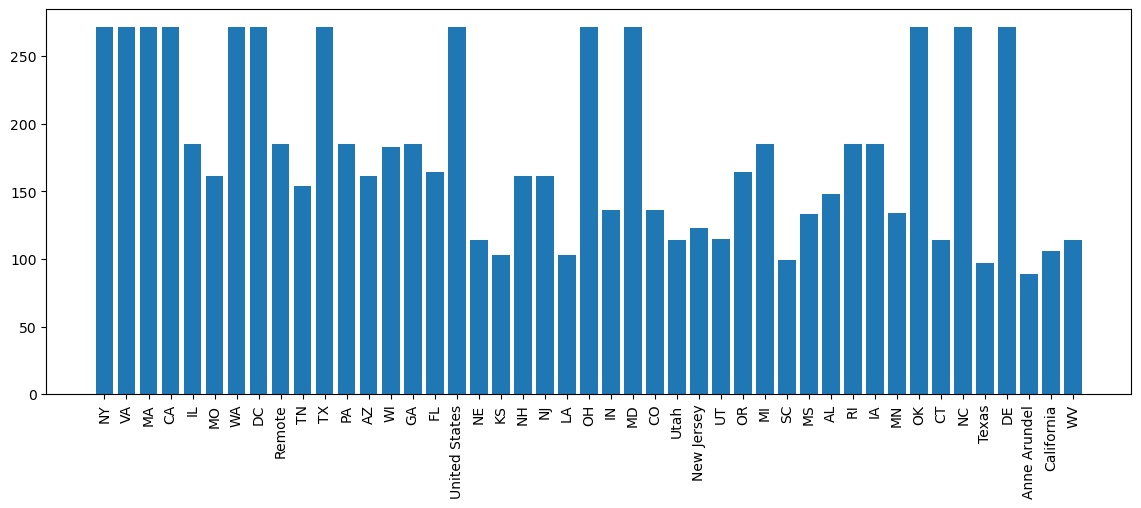

In [312]:
plt.figure(figsize=(14,5))
plt.bar(df['main Loc'],df['Average Sal'])
# sns.barplot(x="main Loc",y='Average Sal',estimator=max,data=df)
plt.xticks(rotation=90);

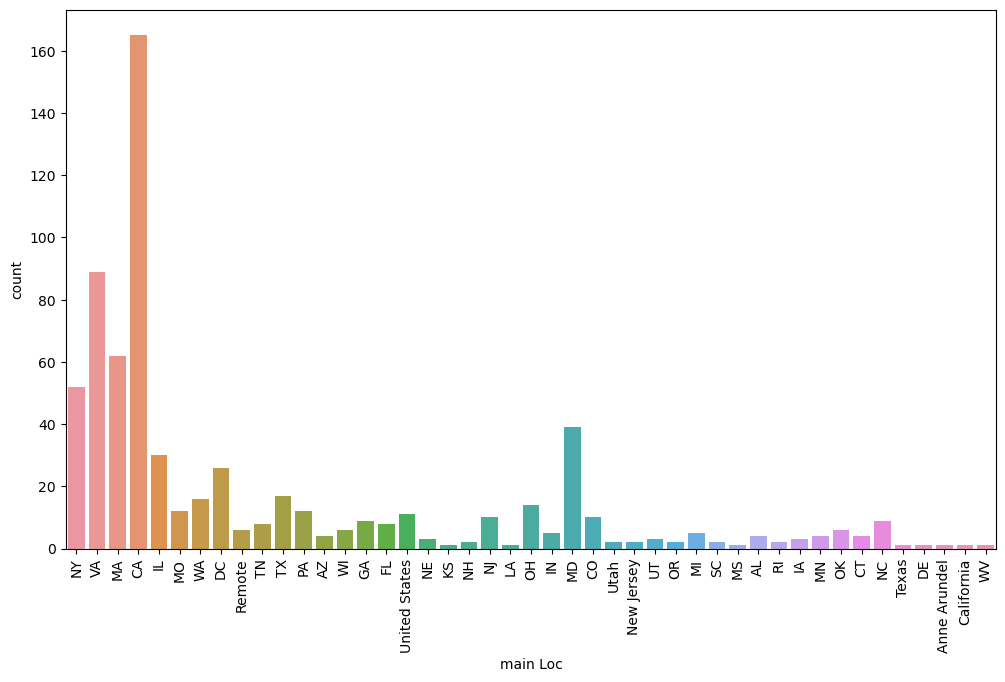

In [313]:
plt.figure(figsize=(12,7))
sns.countplot(x='main Loc',data=df)
plt.xticks(rotation=90);

In [314]:
df['Minimum Sal'].unique()

array([137,  75,  79,  99,  90, 101,  56,  71,  91, 141, 145, 122, 112,
       110, 124,  69,  31,  95, 212,  66, 128, 138,  80,  87,  92, 105],
      dtype=int64)

In [315]:
df['Average Sal'].unique()

array([154, 103, 105, 115,  99, 133,  76,  92,  97, 107, 120, 183, 185,
       113, 134, 114, 136, 161, 106,  43, 271,  89, 164, 148, 123],
      dtype=int64)

In [316]:
df['Maximum Sal'].unique()

array([171, 131, 132, 109, 165,  97, 106, 123, 124, 150, 225, 147, 146,
       116, 163, 198, 133,  56, 119, 331, 112, 201, 158, 141, 155, 167],
      dtype=int64)

In [317]:
Company=df.groupby('Company Name')['Average Sal'].sum().sort_values(ascending=False)

In [318]:
df

Job Title Salary Estimate  \
0                                    Sr Data Scientist    137 - 171      
1                                       Data Scientist    137 - 171      
2                                       Data Scientist    137 - 171      
3                                       Data Scientist    137 - 171      
4                                       Data Scientist    137 - 171      
5                                       Data Scientist    137 - 171      
6             Data Scientist / Machine Learning Expert    137 - 171      
7                                       Data Scientist    137 - 171      
8                     Staff Data Scientist - Analytics    137 - 171      
9                                       Data Scientist    137 - 171      
10                                      Data Scientist    137 - 171      
11                                      Data Scientist    137 - 171      
12           Data Scientist - Statistics, Early Career    137 - 171      
13                                        Data Modeler    137 - 171      
14                                      Data Scientist    137 - 171      
15                          Experienced Data Scientist    137 - 171      
16                           Data Scientist - Contract    137 - 171      
17                                      Data Scientist    137 - 171      
18                                     Data Analyst II    137 - 171      
19                               Medical Lab Scientist    137 - 171      
20                                      Data Scientist    137 - 171      
21                     Data Scientist/Machine Learning    137 - 171      
22                             Human Factors Scientist    137 - 171      
23      Business Intelligence Analyst I- Data Insights    137 - 171      
24                                      Data Scientist    137 - 171      
25                                      Data Scientist    137 - 171      
26                               Data Scientist - Risk    137 - 171      
27                      Data Scientist-Human Resources    137 - 171      
28                                      Data Scientist    137 - 171      
29                                      Data Scientist    137 - 171      
30                                      Data Scientist     75 - 131      
31            Data Scientist / Machine Learning Expert     75 - 131      
32                                      Data Scientist     75 - 131      
33        Senior Research Statistician- Data Scientist     75 - 131      
34                                       Data Engineer     75 - 131      
35                            Associate Data Scientist     75 - 131      
36                       Business Intelligence Analyst     75 - 131      
37                                      Data Scientist     75 - 131      
38                                      Data Scientist     75 - 131      
39                       Senior Analyst/Data Scientist     75 - 131      
40                                        Data Analyst     75 - 131      
41                           Machine Learning Engineer     75 - 131      
42                                      Data Analyst I     75 - 131      
43                       Scientist - Molecular Biology     75 - 131      
44                                      Data Scientist     75 - 131      
45           Computational Scientist, Machine Learning     75 - 131      
46                               Senior Data Scientist     75 - 131      
47                                      Data Scientist     75 - 131      
48                                      Data Scientist     75 - 131      
49                                      Data Scientist     75 - 131      
50                                        Data Analyst     75 - 131      
51                                      Data Scientist     75 - 131      
52                                      Data Scientist     75 - 131      
53                                   Jr. Data Eng

In [319]:
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', ' '], dtype=object)

In [320]:
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', ' ',
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

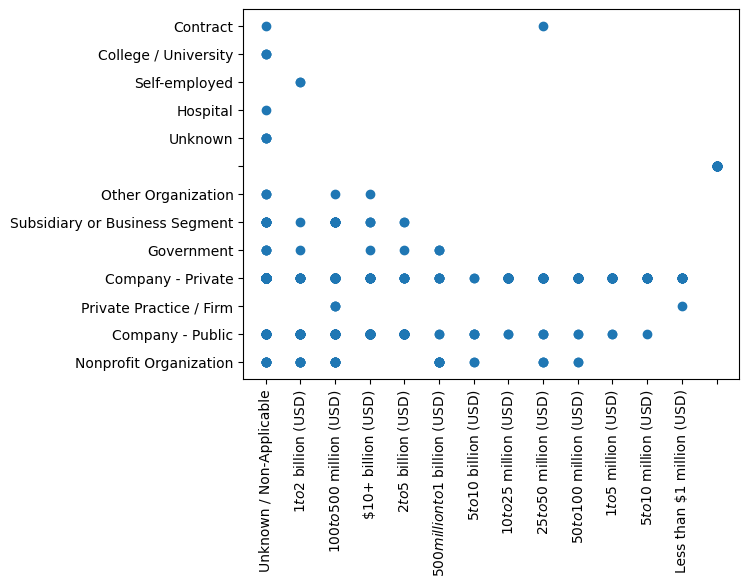

In [321]:
plt.scatter(df['Revenue'],df['Type of ownership'])
plt.xticks(rotation=90);

In [322]:
# df['Job Title'].unique()

In [323]:
df

Job Title Salary Estimate  \
0                                    Sr Data Scientist    137 - 171      
1                                       Data Scientist    137 - 171      
2                                       Data Scientist    137 - 171      
3                                       Data Scientist    137 - 171      
4                                       Data Scientist    137 - 171      
5                                       Data Scientist    137 - 171      
6             Data Scientist / Machine Learning Expert    137 - 171      
7                                       Data Scientist    137 - 171      
8                     Staff Data Scientist - Analytics    137 - 171      
9                                       Data Scientist    137 - 171      
10                                      Data Scientist    137 - 171      
11                                      Data Scientist    137 - 171      
12           Data Scientist - Statistics, Early Career    137 - 171      
13                                        Data Modeler    137 - 171      
14                                      Data Scientist    137 - 171      
15                          Experienced Data Scientist    137 - 171      
16                           Data Scientist - Contract    137 - 171      
17                                      Data Scientist    137 - 171      
18                                     Data Analyst II    137 - 171      
19                               Medical Lab Scientist    137 - 171      
20                                      Data Scientist    137 - 171      
21                     Data Scientist/Machine Learning    137 - 171      
22                             Human Factors Scientist    137 - 171      
23      Business Intelligence Analyst I- Data Insights    137 - 171      
24                                      Data Scientist    137 - 171      
25                                      Data Scientist    137 - 171      
26                               Data Scientist - Risk    137 - 171      
27                      Data Scientist-Human Resources    137 - 171      
28                                      Data Scientist    137 - 171      
29                                      Data Scientist    137 - 171      
30                                      Data Scientist     75 - 131      
31            Data Scientist / Machine Learning Expert     75 - 131      
32                                      Data Scientist     75 - 131      
33        Senior Research Statistician- Data Scientist     75 - 131      
34                                       Data Engineer     75 - 131      
35                            Associate Data Scientist     75 - 131      
36                       Business Intelligence Analyst     75 - 131      
37                                      Data Scientist     75 - 131      
38                                      Data Scientist     75 - 131      
39                       Senior Analyst/Data Scientist     75 - 131      
40                                        Data Analyst     75 - 131      
41                           Machine Learning Engineer     75 - 131      
42                                      Data Analyst I     75 - 131      
43                       Scientist - Molecular Biology     75 - 131      
44                                      Data Scientist     75 - 131      
45           Computational Scientist, Machine Learning     75 - 131      
46                               Senior Data Scientist     75 - 131      
47                                      Data Scientist     75 - 131      
48                                      Data Scientist     75 - 131      
49                                      Data Scientist     75 - 131      
50                                        Data Analyst     75 - 131      
51                                      Data Scientist     75 - 131      
52                                      Data Scientist     75 - 131      
53                                   Jr. Data Eng

In [324]:
# Create a regular expression pattern to match "data science" ignoring case
pattern = re.compile(r'data\s+science', re.IGNORECASE)

# Find job titles containing "data science"
data_science_jobs = [title for title in df['Job Title'] if re.search(pattern, title)]

# Print the matching job titles
for job in data_science_jobs:
    print(job)

Product Data Scientist - Ads Data Science
Data Science Manager, Payment Acceptance - USA
Software Engineer - Data Science
Data Science Instructor
Data Science Software Engineer
Environmental Data Science
Director of Data Science
Manager / Lead, Data Science & Analytics
VP, Data Science
Data Science All Star Program - Data Engineer Track
Data Science Software Engineer
IT Partner Digital Health Technology and Data Science
Product Data Scientist - Ads Data Science
VP, Data Science
Data Science Software Engineer
Data Science Analyst
Software Engineer - Machine Learning & Data Science (Applied Intelligence Services Team)
IT Partner Digital Health Technology and Data Science
Data Science Manager
Developer III - Data Science
Data Science Software Engineer


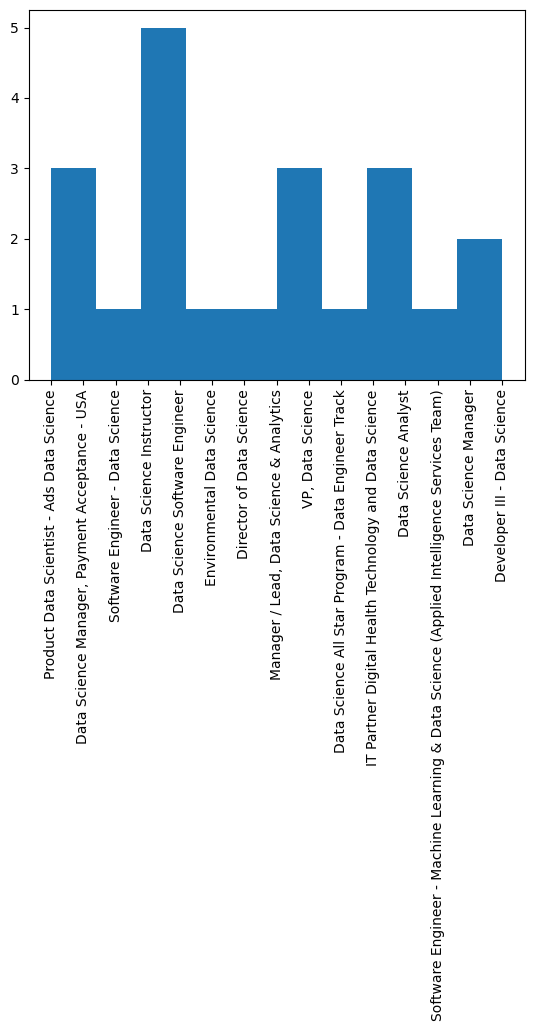

In [325]:
plt.hist(data_science_jobs)
plt.xticks(rotation=90);

In [326]:
df

Job Title Salary Estimate  \
0                                    Sr Data Scientist    137 - 171      
1                                       Data Scientist    137 - 171      
2                                       Data Scientist    137 - 171      
3                                       Data Scientist    137 - 171      
4                                       Data Scientist    137 - 171      
5                                       Data Scientist    137 - 171      
6             Data Scientist / Machine Learning Expert    137 - 171      
7                                       Data Scientist    137 - 171      
8                     Staff Data Scientist - Analytics    137 - 171      
9                                       Data Scientist    137 - 171      
10                                      Data Scientist    137 - 171      
11                                      Data Scientist    137 - 171      
12           Data Scientist - Statistics, Early Career    137 - 171      
13                                        Data Modeler    137 - 171      
14                                      Data Scientist    137 - 171      
15                          Experienced Data Scientist    137 - 171      
16                           Data Scientist - Contract    137 - 171      
17                                      Data Scientist    137 - 171      
18                                     Data Analyst II    137 - 171      
19                               Medical Lab Scientist    137 - 171      
20                                      Data Scientist    137 - 171      
21                     Data Scientist/Machine Learning    137 - 171      
22                             Human Factors Scientist    137 - 171      
23      Business Intelligence Analyst I- Data Insights    137 - 171      
24                                      Data Scientist    137 - 171      
25                                      Data Scientist    137 - 171      
26                               Data Scientist - Risk    137 - 171      
27                      Data Scientist-Human Resources    137 - 171      
28                                      Data Scientist    137 - 171      
29                                      Data Scientist    137 - 171      
30                                      Data Scientist     75 - 131      
31            Data Scientist / Machine Learning Expert     75 - 131      
32                                      Data Scientist     75 - 131      
33        Senior Research Statistician- Data Scientist     75 - 131      
34                                       Data Engineer     75 - 131      
35                            Associate Data Scientist     75 - 131      
36                       Business Intelligence Analyst     75 - 131      
37                                      Data Scientist     75 - 131      
38                                      Data Scientist     75 - 131      
39                       Senior Analyst/Data Scientist     75 - 131      
40                                        Data Analyst     75 - 131      
41                           Machine Learning Engineer     75 - 131      
42                                      Data Analyst I     75 - 131      
43                       Scientist - Molecular Biology     75 - 131      
44                                      Data Scientist     75 - 131      
45           Computational Scientist, Machine Learning     75 - 131      
46                               Senior Data Scientist     75 - 131      
47                                      Data Scientist     75 - 131      
48                                      Data Scientist     75 - 131      
49                                      Data Scientist     75 - 131      
50                                        Data Analyst     75 - 131      
51                                      Data Scientist     75 - 131      
52                                      Data Scientist     75 - 131      
53                                   Jr. Data Eng